# Warm Up
Question 1: how much AirBNB homes are earning in certain time frames and areas
## checking the data

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
#some idea, the available date every month for each listing
#the mean prices each month for each listing
#maximum price why

In [2]:
df_calendar = pd.read_csv('boston/calendar.csv')

In [14]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [15]:
df_calendar.shape

(1308890, 4)

In [3]:
df_listings = pd.read_csv('boston/listings.csv')

In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
df_listings.shape

(3585, 95)

In [2]:
df_reviews = pd.read_csv('boston/reviews.csv')

In [3]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [10]:
df_reviews.shape

(68275, 6)

In [5]:
df_reviews[]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...


###  Let's check if the listing id are same 

In [35]:
listing_id_set0 = set(df_listings['id'].value_counts().index.tolist())

In [36]:
len(listing_id_set0)

3585

In [37]:
listing_id_set1=set(df_calendar['listing_id'].value_counts().index.tolist())

In [38]:
len(listing_id_set1)

3585

In [39]:
listing_id_set2=set(df_reviews['listing_id'].value_counts().index.tolist())

In [40]:
len(listing_id_set2)

2829

In [41]:
listing_id_set0==listing_id_set1 # all calendar listing_id is same as in listings

True

In [43]:
listing_id_set2 | listing_id_set0 == listing_id_set0 # all listing id in reviews belong be listing id

True

### calculate the earning

In [6]:
df_calendar.dtypes # we need change the price to float

listing_id     int64
date          object
available     object
price         object
dtype: object

In [56]:
df_calendar['available'].value_counts(dropna=False)

f    665853
t    643037
Name: available, dtype: int64

In [67]:
#check consistance
df_calendar['price'][df_calendar['available']=='f'].isnull().mean() #should be all NaN

1.0

In [68]:
df_calendar['price'][df_calendar['available']=='t'].isnull().mean() #should all none NaN

0.0

Price is object, need to change to float

In [5]:
df_calendar['price'].dropna().str.contains("\$*").mean() #check if all valid price starting with $

1.0

In [6]:
float(df_calendar['price'][365][1:])

65.0

In [7]:
df_calendar['listing_id'].isnull().mean() # make sure all listing_id is valid

0.0

In [7]:
df_calendar['price'].fillna('$0')#fill all NaN by 0 no this is not a good idea, 

In [7]:
df_calendar_drop_na = df_calendar.dropna().copy()

In [8]:
df_calendar_drop_na.shape

(643037, 4)

In [9]:
df_calendar_drop_na['price'].head()

365    $65.00
366    $65.00
367    $65.00
368    $75.00
369    $75.00
Name: price, dtype: object

In [10]:
def drop_c(price):
    res=""
    for c in price:
        if c !='$' and c!=',':
            res += c
    return res

In [11]:
df_calendar_drop_na['price']=df_calendar_drop_na['price'].apply(drop_c)#drop all $ and ,

In [12]:
df_calendar_drop_na['price'].head()

365    65.00
366    65.00
367    65.00
368    75.00
369    75.00
Name: price, dtype: object

In [13]:
df_calendar_drop_na['price']=df_calendar_drop_na['price'].astype('float64') 

In [14]:
df_calendar_drop_na['price'].head()

365    65.0
366    65.0
367    65.0
368    75.0
369    75.0
Name: price, dtype: float64

In [24]:
df_calendar_drop_na['date'].isnull().sum() #check if there is a NULL for date

0

In [15]:
#change the date to datetime type
df_calendar_drop_na['date'] = pd.to_datetime(df_calendar_drop_na['date'],format='%Y-%m-%d')

In [78]:
df_calendar_drop_na.dtypes

listing_id      int64
available        bool
price         float64
dtype: object

In [16]:
df_calendar_drop_na['available'] = df_calendar['available'].map({'t':True,'f':False})

In [17]:
df_calendar_drop_na.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [50]:
df_calendar

4

In [18]:
df_calendar_drop_na.set_index('date',inplace=True) #set index to be the date

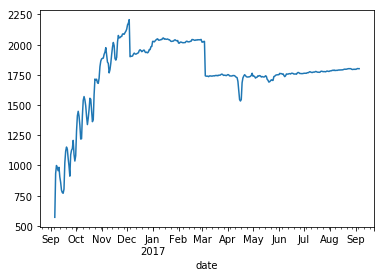

In [19]:
df_calendar_drop_na.resample('D')['available'].sum().plot()

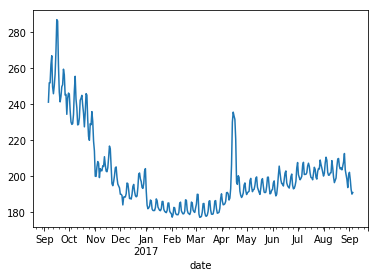

In [20]:
df_calendar_drop_na['price'].resample('D').mean().plot()

In [41]:
price_mean_per_day=df_calendar_drop_na['price'].resample('D').mean()

In [53]:
avai_sum_per_day=df_calendar_drop_na.resample('D')['available'].sum()

In [42]:
price_mean_per_day.head()

date
2016-09-06    241.043860
2016-09-07    251.833691
2016-09-08    251.748749
2016-09-09    261.859327
2016-09-10    266.847280
Freq: D, Name: price, dtype: float64

In [64]:
avai_sum_per_day.head()

date
2016-09-06    570.0
2016-09-07    932.0
2016-09-08    999.0
2016-09-09    981.0
2016-09-10    956.0
Freq: D, Name: available, dtype: float64

In [46]:
mat_time=mpl.dates.date2num(price_mean_per_day.index)

In [66]:
avai_sum_per_day_mean = avai_sum_per_day.mean()
avai_sum_per_day_std=avai_sum_per_day.std()
price_mean_per_day_mean = price_mean_per_day.mean()
price_mean_per_day_std=price_mean_per_day.std()

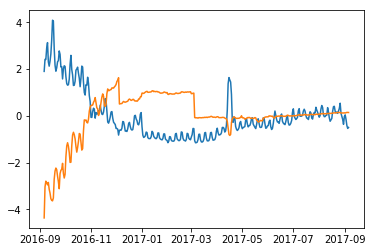

In [69]:
plt.plot(price_mean_per_day.index,(price_mean_per_day.values-price_mean_per_day_mean)/price_mean_per_day_std);
plt.plot(avai_sum_per_day.index,(avai_sum_per_day.values-avai_sum_per_day_mean)/avai_sum_per_day_std)

In [77]:
df_calendar_drop_na = df_calendar_drop_na.reset_index()

In [83]:
df_calendar_drop_na['day_of_week'] = df_calendar_drop_na['date'].dt.day_name()

0   2017-08-22
1   2017-08-21
2   2017-08-20
3   2017-08-19
4   2017-08-18
Name: date, dtype: datetime64[ns]

In [88]:
df_calendar_drop_na.groupby('day_of_week')['price'].mean()

day_of_week
Friday       203.121167
Monday       195.809561
Saturday     203.408387
Sunday       198.219764
Thursday     198.073112
Tuesday      195.173842
Wednesday    195.418228
Name: price, dtype: float64

In [91]:
df_calendar_drop_na.groupby('day_of_week')['available'].sum()

day_of_week
Friday       90998.0
Monday       92413.0
Saturday     91068.0
Sunday       92208.0
Thursday     91202.0
Tuesday      93332.0
Wednesday    91816.0
Name: available, dtype: float64

In [113]:
price_mean_per_day=price_mean_per_day.reset_index()

In [138]:
price_mean_per_day['day_of_week'] = price_mean_per_day['date'].dt.day_name()
price_mean_per_day['day_of_week_n'] =price_mean_per_day['date'].dt.dayofweek

In [139]:
price_mean_per_day.head()

,date,price,day_of_week,day_of_week_n
0,2016-09-06,241.043860,Tuesday,1
1,2016-09-07,251.833691,Wednesday,2
2,2016-09-08,251.748749,Thursday,3
3,2016-09-09,261.859327,Friday,4
4,2016-09-10,266.847280,Saturday,5


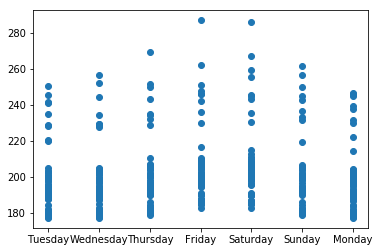

In [127]:
plt.scatter(price_mean_per_day.set_index('day_of_week')['price'].index,price_mean_per_day.set_index('day_of_week')['price'].values)

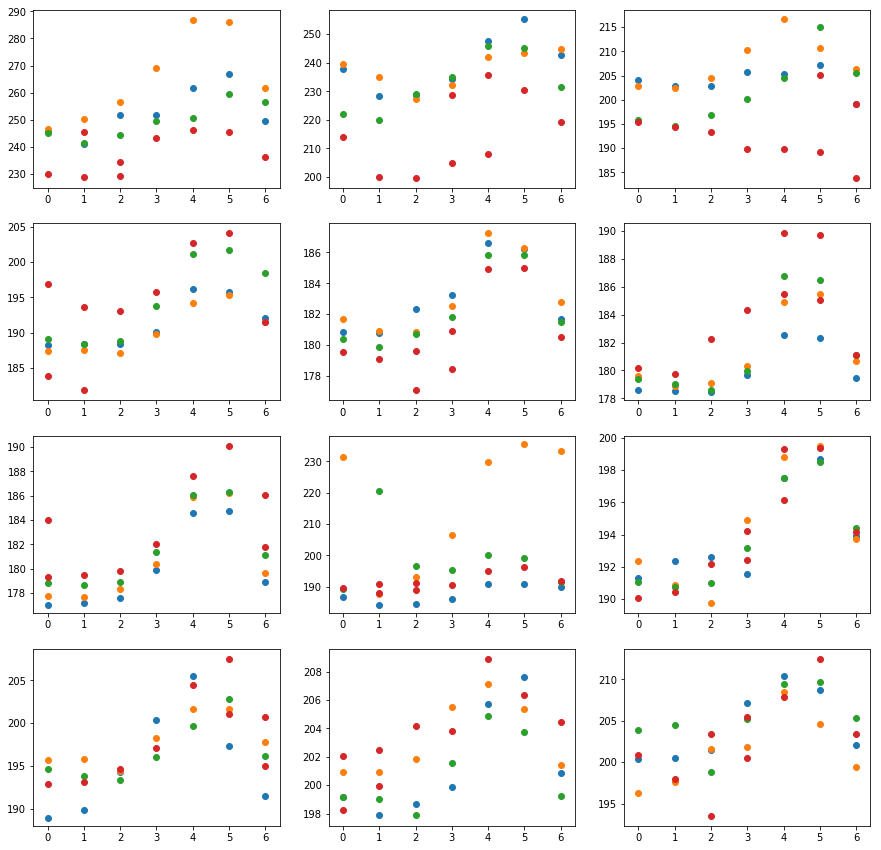

In [142]:
f,axarr = plt.subplots(4,3)
f.set_figheight(15)
f.set_figwidth(15)
for i in range(4):
    for j in range(3):
        m0 = (j+i*3)*30
        m1 = m0+30
        for w in range(4):
            day0=m0+w*7
            day1=day0+7
            if w==3:
                day1 = m1
            axarr[i][j].scatter(price_mean_per_day.set_index('day_of_week_n')['price'][day0:day1].index,
                      price_mean_per_day.set_index('day_of_week_n')['price'][day0:day1].values)

In [148]:
avai_sum_per_list=df_calendar_drop_na.groupby('listing_id')['available'].sum()

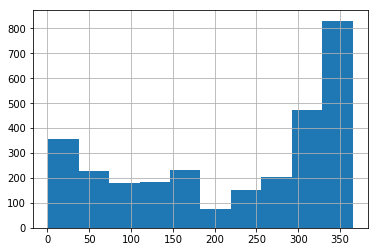

In [158]:
avai_sum_per_list.hist()

In [152]:
price_mean_per_list=df_calendar_drop_na.groupby('listing_id')['price'].mean()

In [155]:
price_mean_per_list.head()

listing_id
3353     35.204819
5506    147.267442
6695    197.407407
6976     65.000000
8792    154.000000
Name: price, dtype: float64

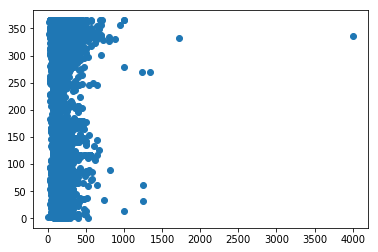

In [157]:
plt.scatter(price_mean_per_list,avai_sum_per_list)

In [21]:
df_calendar_drop_na[df_calendar_drop_na['listing_id']==3075044]['price'].head()

date
2017-08-22    65.0
2017-08-21    65.0
2017-08-20    65.0
2017-08-19    75.0
2017-08-18    75.0
Name: price, dtype: float64

In [62]:
df_calendar_drop_na.loc['2016-09-06']['price'].mean()

241.0438596491228

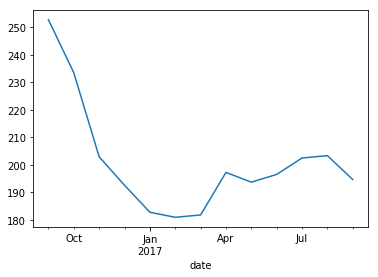

In [36]:
df_calendar_drop_na['price'].resample('M').mean().plot()

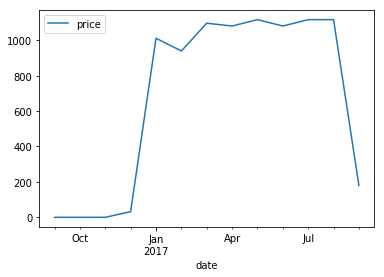

In [24]:
df_calendar[df_calendar['listing_id']==3353].resample('M').sum().plot(y='price')

In [25]:
df_calendar[df_calendar['listing_id']==3353].resample('M').sum()

,listing_id,available,price
date,,,
2016-09-30,83825,0.0,0.0
2016-10-31,103943,0.0,0.0
2016-11-30,100590,0.0,0.0
2016-12-31,103943,1.0,32.0
2017-01-31,103943,31.0,1011.0
2017-02-28,93884,28.0,939.0
2017-03-31,103943,31.0,1096.0
2017-04-30,100590,30.0,1080.0
2017-05-31,103943,31.0,1116.0


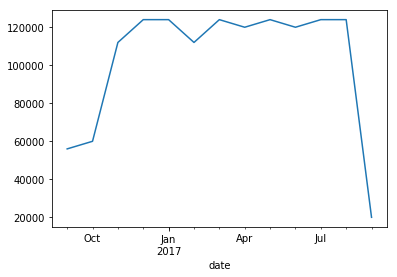

In [26]:
df_calendar[df_calendar['listing_id']==12972378]['price'].resample('M').sum().plot(y='price')

In [27]:
df_calendar[df_calendar['listing_id']==12972378]['price'].resample('M').sum()

date
2016-09-30     56000.0
2016-10-31     60000.0
2016-11-30    112000.0
2016-12-31    124000.0
2017-01-31    124000.0
2017-02-28    112000.0
2017-03-31    124000.0
2017-04-30    120000.0
2017-05-31    124000.0
2017-06-30    120000.0
2017-07-31    124000.0
2017-08-31    124000.0
2017-09-30     20000.0
Freq: M, Name: price, dtype: float64

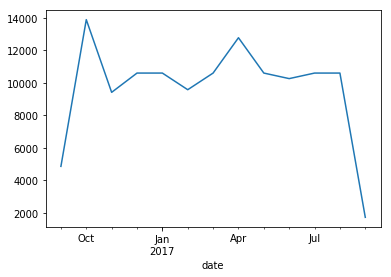

In [120]:
df_calendar[df_calendar['listing_id']==9857]['price'].resample('M').sum().plot(y='price')

In [28]:
df_calendar[df_calendar['listing_id']==9857]['price'].resample('M').sum()

date
2016-09-30     4851.0
2016-10-31    13895.0
2016-11-30     9414.0
2016-12-31    10602.0
2017-01-31    10602.0
2017-02-28     9576.0
2017-03-31    10602.0
2017-04-30    12780.0
2017-05-31    10602.0
2017-06-30    10260.0
2017-07-31    10602.0
2017-08-31    10602.0
2017-09-30     1710.0
Freq: M, Name: price, dtype: float64

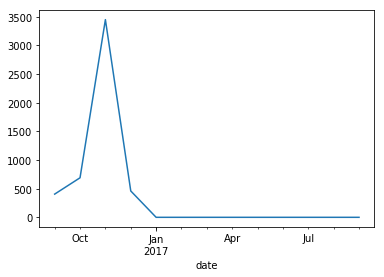

In [20]:
df_calendar[df_calendar['listing_id']==10758]['price'].resample('M').sum().plot(y='price')

In [31]:
df_calendar[df_calendar['listing_id']==10758]['price'].resample('M').sum()

date
2016-09-30     405.0
2016-10-31     690.0
2016-11-30    3450.0
2016-12-31     460.0
2017-01-31       0.0
2017-02-28       0.0
2017-03-31       0.0
2017-04-30       0.0
2017-05-31       0.0
2017-06-30       0.0
2017-07-31       0.0
2017-08-31       0.0
2017-09-30       0.0
Freq: M, Name: price, dtype: float64

In [33]:
df_listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [47]:
df_listings[['host_since','host_name','host_location','host_neighbourhood','host_is_superhost','host_listings_count']].head()

,host_since,host_name,host_location,host_neighbourhood,host_is_superhost,host_listings_count
0,2015-04-15,Virginia,"Boston, Massachusetts, United States",Roslindale,f,1
1,2012-06-07,Andrea,"Boston, Massachusetts, United States",Roslindale,f,1
2,2009-05-11,Phil,"Boston, Massachusetts, United States",Roslindale,t,1
3,2013-04-21,Meghna,"Boston, Massachusetts, United States",NaN,f,1
4,2014-05-11,Linda,"Boston, Massachusetts, United States",Roslindale,t,1


In [49]:
df_listings['host_name'].value_counts().head()

Kara        138
Seamless     79
Mike         71
Flatbook     58
Alicia       50
Name: host_name, dtype: int64

In [59]:
df_listings[df_listings['host_name']=='Kara']['host_listings_count'].head()

428    749
442    749
443    749
455    749
468    749
Name: host_listings_count, dtype: int64

In [42]:
df_listings['host_url'].head()

0    https://www.airbnb.com/users/show/31303940
1     https://www.airbnb.com/users/show/2572247
2       https://www.airbnb.com/users/show/16701
3     https://www.airbnb.com/users/show/6031442
4    https://www.airbnb.com/users/show/15396970
Name: host_url, dtype: object

In [44]:
df_listings['city'].head()

0    Boston
1    Boston
2    Boston
3    Boston
4    Boston
Name: city, dtype: object

In [45]:
df_listings['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Brighton                       15
Dorchester                     15
Charlestown                    15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
ALLSTON                         2
Boston, Massachusetts, US       2
Hyde Park                       2
Jamaica Plain, Boston           2
South Boston                    2
Jamaica Plain                   2
Jamaica Plain (Boston)          1
Newton                          1
dorchester, boston              1
east Boston                     1
Boston (Charlestown)            1
boston                          1
Mission Hill, Boston            1
波士顿                             1
Watertown     

In [24]:
df_listings[['latitude','longitude']].head()

,latitude,longitude
0,42.282619,-71.133068
1,42.286241,-71.134374
2,42.292438,-71.135765
3,42.281106,-71.121021
4,42.284512,-71.136258


In [25]:
df_listings[['latitude','longitude']].dtypes

latitude     float64
longitude    float64
dtype: object

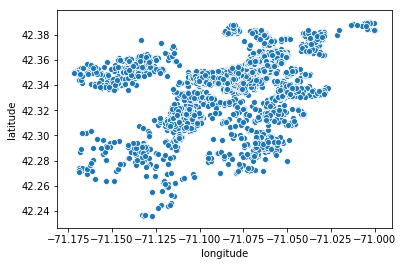

In [21]:
sb.scatterplot(x='longitude',y='latitude',data=df_listings)

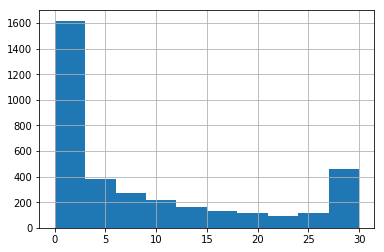

In [22]:
df_listings['availability_30'].hist()

In [68]:
df_listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [70]:
df_listings['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [71]:
df_listings['cleaning_fee'].head()

0    $35.00
1    $10.00
2       NaN
3    $50.00
4    $15.00
Name: cleaning_fee, dtype: object

In [27]:
df_calendar.groupby('listing_id').sum()

,available,price
listing_id,,
3353,249.0,8766.0
5506,344.0,50660.0
6695,324.0,63960.0
6976,319.0,20735.0
8792,248.0,38192.0
9273,364.0,81900.0
9765,362.0,85742.0
9824,323.0,71810.0
9855,364.0,97026.0


In [28]:
df_listings['id']

0       12147973
1        3075044
2           6976
3        1436513
4        7651065
5       12386020
6        5706985
7        2843445
8         753446
9         849408
10      12023024
11       1668313
12       2684840
13      13547301
14       5434353
15        225979
16       3420384
17      13512930
18       7482195
19       7252607
20       2583074
21      13251243
22        225834
23       6400432
24       5498472
25        894539
26        879929
27       9218312
28        321328
29       1810172
          ...   
3555    13015653
3556    14849141
3557    14604429
3558    14592644
3559    12915510
3560    14887382
3561    14823430
3562    14881840
3563    11452297
3564    14576706
3565    14335003
3566    14871445
3567    14472678
3568    14574800
3569    14426586
3570     3131519
3571    14592547
3572    14744740
3573    14504583
3574    14743129
3575     5280827
3576    14689681
3577    13750763
3578    14536322
3579    14852179
3580     8373729
3581    14844274
3582    145854

In [27]:
sub_list_pos = df_listings[['id','latitude','longitude']].copy()

In [20]:
sub_list_pos.head()

,id,latitude,longitude
0,12147973,42.282619,-71.133068
1,3075044,42.286241,-71.134374
2,6976,42.292438,-71.135765
3,1436513,42.281106,-71.121021
4,7651065,42.284512,-71.136258


In [42]:
sub_list_pos['id'].head()

0    12147973
1     3075044
2        6976
3     1436513
4     7651065
Name: id, dtype: int64

In [46]:
sub_list_pos.head()

,id,latitude,longitude
0,12147973,42.282619,-71.133068
1,3075044,42.286241,-71.134374
2,6976,42.292438,-71.135765
3,1436513,42.281106,-71.121021
4,7651065,42.284512,-71.136258


In [28]:
sub_list_pos.rename(columns={'id':'listing_id'},inplace=True)

In [29]:
sub_list_pos.head()

,listing_id,latitude,longitude
0,12147973,42.282619,-71.133068
1,3075044,42.286241,-71.134374
2,6976,42.292438,-71.135765
3,1436513,42.281106,-71.121021
4,7651065,42.284512,-71.136258


In [30]:
sub_list_pos.set_index('listing_id').head()

,latitude,longitude
listing_id,,
12147973,42.282619,-71.133068
3075044,42.286241,-71.134374
6976,42.292438,-71.135765
1436513,42.281106,-71.121021
7651065,42.284512,-71.136258


In [24]:
df_calendar.groupby('listing_id').sum().head()

,available,price
listing_id,,
3353,249.0,8766.0
5506,344.0,50660.0
6695,324.0,63960.0
6976,319.0,20735.0
8792,248.0,38192.0


In [34]:
sub_list_pos['price']=df_calendar.groupby('listing_id').sum()['price']

In [36]:
sub_list_pos.drop(columns='price',inplace=True)

In [37]:
sub_list_pos.head()

,listing_id,latitude,longitude
0,12147973,42.282619,-71.133068
1,3075044,42.286241,-71.134374
2,6976,42.292438,-71.135765
3,1436513,42.281106,-71.121021
4,7651065,42.284512,-71.136258


In [31]:
sub_list_pos.set_index('listing_id',inplace=True)

In [33]:
sub_list_pos.head()

,latitude,longitude
listing_id,,
12147973,42.282619,-71.133068
3075044,42.286241,-71.134374
6976,42.292438,-71.135765
1436513,42.281106,-71.121021
7651065,42.284512,-71.136258


In [68]:
df_calendar.groupby('listing_id').sum().head()

,available,price
listing_id,,
3353,249.0,8766.0
5506,344.0,50660.0
6695,324.0,63960.0
6976,319.0,20735.0
8792,248.0,38192.0


In [34]:
sub_list_pos['tot_earning'] =  df_calendar.groupby('listing_id').sum()['price']

In [35]:
sub_list_pos.head()

,latitude,longitude,tot_earning
listing_id,,,
12147973,42.282619,-71.133068,0.0
3075044,42.286241,-71.134374,24345.0
6976,42.292438,-71.135765,20735.0
1436513,42.281106,-71.121021,7350.0
7651065,42.284512,-71.136258,26386.0


In [71]:
df_list_sum=df_calendar.groupby('listing_id').sum()

In [76]:
df_list_sum.head()

,available,price
listing_id,,
3353,249.0,8766.0
5506,344.0,50660.0
6695,324.0,63960.0
6976,319.0,20735.0
8792,248.0,38192.0


In [80]:
df_list_sum.shape

(3585, 2)

In [83]:
df_list_sum.loc[12147973,:]

available    0.0
price        0.0
Name: 12147973, dtype: float64

In [42]:
sub_list_pos[sub_list_pos['tot_earning']>0].describe()

,latitude,longitude,tot_earning
count,2906.000000,2906.000000,2.906000e+03
mean,42.339453,-71.083440,4.391038e+04
std,0.025284,0.031165,5.050698e+04
min,42.235942,-71.171789,2.200000e+01
25%,42.328059,-71.102615,1.276725e+04
50%,42.345084,-71.077312,3.043250e+04
75%,42.354830,-71.061820,5.976900e+04
max,42.389982,-71.000100,1.344000e+06


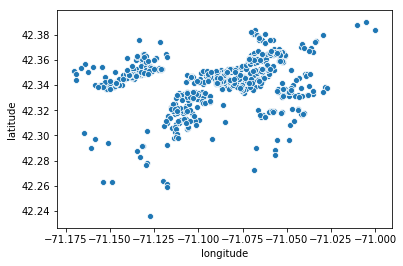

In [44]:
#check the earning is 0
sb.scatterplot(data=sub_list_pos[sub_list_pos['tot_earning']==0],x='longitude',y='latitude')

(array([3.468e+03, 1.080e+02, 7.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,  134400.,  268800.,  403200.,  537600.,  672000.,
         806400.,  940800., 1075200., 1209600., 1344000.]),
 <a list of 10 Patch objects>)

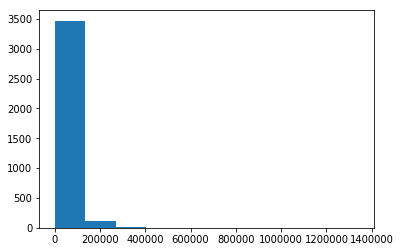

In [36]:
plt.hist(sub_list_pos['tot_earning'])

(array([1.000e+00, 2.100e+01, 5.500e+01, 9.000e+01, 2.290e+02, 4.540e+02,
        1.102e+03, 8.770e+02, 7.500e+01, 2.000e+00]),
 array([ 3.09104245,  4.19305429,  5.29506612,  6.39707796,  7.49908979,
         8.60110163,  9.70311346, 10.8051253 , 11.90713713, 13.00914897,
        14.1111608 ]),
 <a list of 10 Patch objects>)

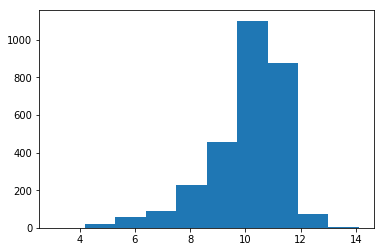

In [54]:
plt.hist(np.log(sub_list_pos[sub_list_pos['tot_earning']>0]['tot_earning']))

In [58]:
df_

,listing_id,available,price
date,,,
2017-09-05,12147973,False,0.0
2017-09-04,12147973,False,0.0
2017-09-03,12147973,False,0.0
2017-09-02,12147973,False,0.0
2017-09-01,12147973,False,0.0


In [88]:
sub_list_pos.head()

,latitude,longitude,tot_earning
listing_id,,,
12147973,42.282619,-71.133068,0.0
3075044,42.286241,-71.134374,24345.0
6976,42.292438,-71.135765,20735.0
1436513,42.281106,-71.121021,7350.0
7651065,42.284512,-71.136258,26386.0


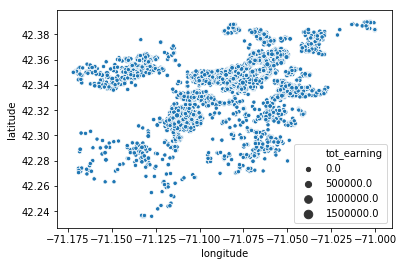

In [34]:
sb.scatterplot(data=sub_list_pos,x='longitude',y='latitude',size='tot_earning')

C:\Users\zzguk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


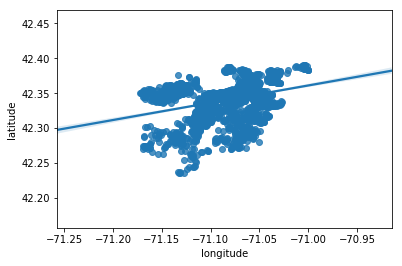

In [35]:
sb.regplot(data=sub_list_pos,x='longitude',y='latitude')

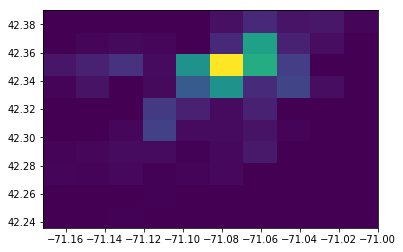

In [45]:
plt.hist2d(x=sub_list_pos['longitude'],y=sub_list_pos['latitude'],weights=sub_list_pos['tot_earning']);

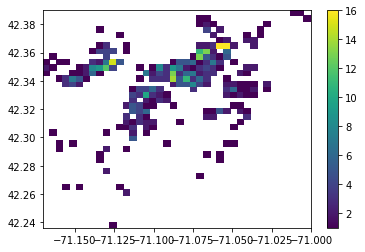

In [48]:
fig, ax = plt.subplots()
h = ax.hist2d(cmin=1,bins=40,x=sub_list_pos[sub_list_pos['tot_earning']==0]['longitude'],y=sub_list_pos[sub_list_pos['tot_earning']==0]['latitude'])
plt.colorbar(h[3], ax=ax)

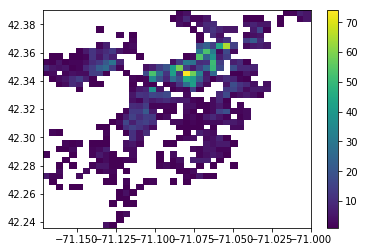

In [47]:
fig, ax = plt.subplots()
h = ax.hist2d(cmin=1,bins=40,x=sub_list_pos['longitude'],y=sub_list_pos['latitude'])
plt.colorbar(h[3], ax=ax)

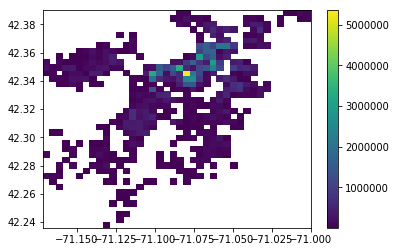

In [37]:
fig, ax = plt.subplots()
h = ax.hist2d(cmin=1,bins=40,x=sub_list_pos['longitude'],y=sub_list_pos['latitude'],weights=sub_list_pos['tot_earning'])
plt.colorbar(h[3],ax=ax)

C:\Users\zzguk\Anaconda3\lib\site-packages\matplotlib\colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


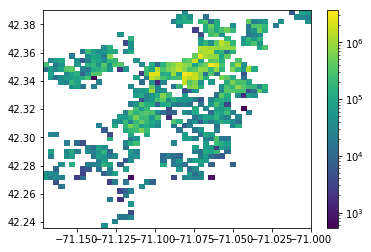

In [36]:
fig, ax = plt.subplots()
h = ax.hist2d(cmin=1,bins=50,x=sub_list_pos['longitude'],y=sub_list_pos['latitude'],weights=sub_list_pos['tot_earning'],norm=mpl.colors.LogNorm())
plt.colorbar(h[3],ax=ax)

In [38]:
sub_list_pos.head()

,latitude,longitude,tot_earning
listing_id,,,
12147973,42.282619,-71.133068,0.0
3075044,42.286241,-71.134374,24345.0
6976,42.292438,-71.135765,20735.0
1436513,42.281106,-71.121021,7350.0
7651065,42.284512,-71.136258,26386.0


In [39]:
cluster_features= sub_list_pos[['latitude','longitude','tot_earning']]

In [40]:
cluster_features.head()

,latitude,longitude,tot_earning
listing_id,,,
12147973,42.282619,-71.133068,0.0
3075044,42.286241,-71.134374,24345.0
6976,42.292438,-71.135765,20735.0
1436513,42.281106,-71.121021,7350.0
7651065,42.284512,-71.136258,26386.0


In [42]:
scaler = StandardScaler()

In [43]:
cluster_features_norm = scaler.fit_transform(cluster_features)

In [44]:
cluster_features_norm[0:5]

array([[-2.35307108, -1.52883419, -0.73220295],
       [-2.20462221, -1.57021649, -0.23139915],
       [-1.95063528, -1.6143001 , -0.30566087],
       [-2.41506536, -1.1471275 , -0.58100525],
       [-2.27546944, -1.62991446, -0.1894135 ]])

In [46]:
scaler = MinMaxScaler()

In [47]:
cluster_features_norm = scaler.fit_transform(cluster_features)

In [48]:
cluster_features_norm[0:5]

array([[0.30301887, 0.22552938, 0.        ],
       [0.32653243, 0.2179224 , 0.01811384],
       [0.3667627 , 0.20981885, 0.01542783],
       [0.29319929, 0.29569557, 0.00546875],
       [0.31531059, 0.20694858, 0.01963244]])

In [62]:
km = KMeans(n_clusters=3)

In [63]:
km.fit(cluster_features_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
km.cluster_centers_

array([[0.74748728, 0.62582657, 0.03158594],
       [0.43388671, 0.40383433, 0.01918565],
       [0.72072119, 0.28089528, 0.01974285]])

In [65]:
predict = km.predict(cluster_features_norm)

In [66]:
colors = {0:'red',1:'blue',2:'green'}

In [68]:
index0 = predict==0

In [71]:
index1 = predict==1

In [72]:
index2 = predict==2

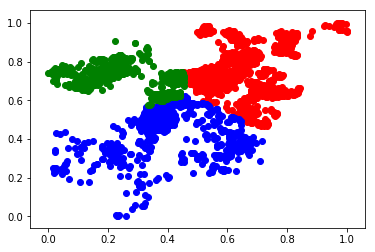

In [73]:
plt.scatter(x=cluster_features_norm[index0,1],y=cluster_features_norm[index0,0],c='red')
plt.scatter(x=cluster_features_norm[index1,1],y=cluster_features_norm[index1,0],c='blue')
plt.scatter(x=cluster_features_norm[index2,1],y=cluster_features_norm[index2,0],c='green')